# Quadratic approximation for posterior computation
In this example we will look at the quadratic approximation for posterior computation in a coin tossing model.

In [1]:
import scipy.stats as st
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
num_tails = 6
num_trials = 9
num_points = 20

In [3]:
prior = st.beta(1, 1)

## Find the posterior mode, i.e., point where it posterior is max
To do this we use scipy's minimizer. To parse it as a convex maximisation problem we take a log of the posterior. To make it a minimisation task we take a negative of it.

In [4]:
def log_posterior(x, num_tails, num_trials):
    return -np.log(st.binom.pmf(num_tails, num_trials, p=x) * prior.pdf(x))

In [5]:
w_0 = 0.5
solution = minimize(log_posterior, w_0, args=(num_tails, num_trials), bounds=[(1e-7,0.9999)], method='SLSQP')
w_map = solution.x
w_map

array([0.66666381])

### Estimate the curvature around the peak
Since the quadratic distribution uses the Gaussian distribution we have
$$p(x) =  {\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$$
If we take the -log
$$-\log(p(x))= \log(\sigma) + 0.5 \log(2 \pi) + \frac{1}{2 \sigma^2} (x−\mu)^2$$
$$\frac{d^2 (-\log(p(x)))}{d \mu^2} = \frac{1}{\sigma^2}$$ 

To calculte this secod derivative we use the **central difference method**
$$f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{ h^2}$$

In [6]:
h = 0.01

In [7]:
std = (1 / ((log_posterior(w_map+h, num_tails, num_trials) - 2 * log_posterior(w_map, num_tails, num_trials) + log_posterior(w_map-h, num_tails, num_trials)) / h**2))**0.5

In [8]:
std

array([0.15710899])

## Compare quadratic approximation with the exact result

In [9]:
p_grid = np.linspace(0, 1, 1000)

In [10]:
exact_posterior_pdf = st.beta(a = 1 + num_tails, b = num_trials - num_tails + 1).pdf(p_grid)
approx_posterior_pdf = st.norm(w_map, std).pdf(p_grid)

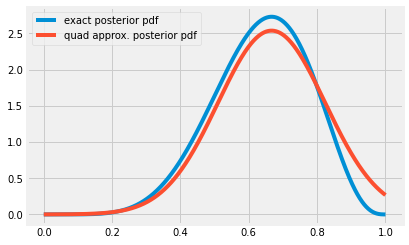

In [11]:
plt.plot(p_grid, exact_posterior_pdf, label="exact posterior pdf")
plt.plot(p_grid, approx_posterior_pdf, label="quad approx. posterior pdf")
plt.legend(loc="upper left")
plt.show()